## Ordering data

In [1]:
import os

ls = os.listdir
ls('../dataset')

['yes', 'no']

In [2]:
train_dir = "train"
val_dir = "valid"

dirs = ["train","train/yes", "train/no", "valid", "valid/yes", "valid/no"]

for _dir in dirs:
    if not os.path.exists(_dir):
        os.mkdir(_dir)

print(ls("train"))
print(ls("valid"))

['yes', 'no']
['yes', 'no']


In [3]:
imgs_yes = "../dataset/yes"
imgs_no = "../dataset/no"

part_yes = round(0.8 * len(ls(imgs_yes)))
part_no = round(0.8 * len(ls(imgs_no)))

train_yes = ls(imgs_yes)[0:part_yes]
train_no = ls(imgs_no)[0:part_no]

valid_yes = ls(imgs_yes)[part_yes:]
valid_no = ls(imgs_no)[part_no:]

for img in train_yes:
    os.system(f"cp {imgs_yes}/{img} train/yes/{img}")
    
for img in train_no:
    os.system(f"cp {imgs_no}/{img} train/no/{img}")
    
for img in valid_yes:
    os.system(f"cp {imgs_yes}/{img} valid/yes/{img}")

for img in valid_no:
    os.system(f"cp {imgs_no}/{img} valid/no/{img}")

## Data Augmentation

In [4]:
training_dir = 'train/'
valid_dir = 'valid/'

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest'
                                )

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(300, 300),
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(300, 300),
    class_mode='binary'
)

Found 147 images belonging to 2 classes.
Found 36 images belonging to 2 classes.


## Model building

In [6]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['binary_accuracy'])

history = model.fit(train_generator, epochs=30, validation_data=valid_generator)

Epoch 1/30
5/5 [==============================] - 15s 3s/step - loss: 0.4985 - binary_accuracy: 0.7483 - val_loss: 0.4067 - val_binary_accuracy: 0.8611
Epoch 2/30
5/5 [==============================] - 8s 2s/step - loss: 0.4595 - binary_accuracy: 0.8435 - val_loss: 0.4047 - val_binary_accuracy: 0.8611
Epoch 3/30
5/5 [==============================] - 11s 2s/step - loss: 0.4328 - binary_accuracy: 0.8435 - val_loss: 0.4112 - val_binary_accuracy: 0.8611
Epoch 4/30
5/5 [==============================] - 8s 1s/step - loss: 0.4381 - binary_accuracy: 0.8435 - val_loss: 0.4039 - val_binary_accuracy: 0.8611
Epoch 5/30
5/5 [==============================] - 11s 2s/step - loss: 0.4283 - binary_accuracy: 0.8435 - val_loss: 0.4053 - val_binary_accuracy: 0.8611
Epoch 6/30
5/5 [==============================] - 8s 1s/step - loss: 0.4257 - binary_accuracy: 0.8435 - val_loss: 0.4089 - val_binary_accuracy: 0.8611
Epoch 7/30
5/5 [==============================] - 7s 1s/step - loss: 0.4375 - binary_accura

## Plotting loss and accuracy

<AxesSubplot:>

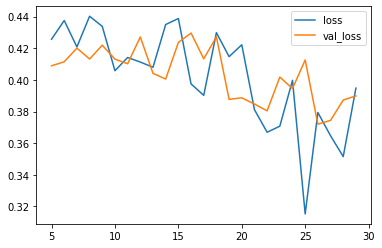

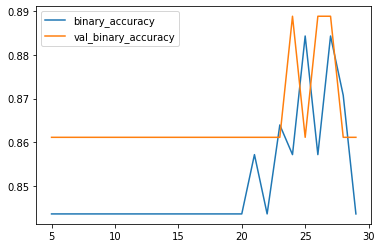

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)

history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()